ЛР4. 1. Реализуйте метод восстановления плотности:
- методом ядерного сглаживания
- с помощью ЕМ алгоритма

2. Возьмите любой набор случайных точек в любой библиотеке, например Sci-learn mkbpx и визуализируйте эти данные и ту плотность, котораая будет восстановлена вашими методами

3. Реализуйте меот метрополиса-гастинга для несимметричного
4. Реализуйте метод гиббса

5. Примените два этих метода на основе той функции плотности, которая была восстановлена на предыдущем пункте, тем самым вы получите другой набор точек.

6. Визуализировать 2 набора точек двумя разными цветами, сравнить с началом, и показать, где ошибки.

7*. Нарисовать отдельно картинку блуждания в случае трёхмерной функции плотности (метод метрополиса гастингса).

8* Нужно сравнить красный и синий набор точек вероятностными методами, KL-дивергенция.

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde
from sklearn.datasets import make_moons, load_wine

# Генерация случайных данных

In [2]:
np.random.seed(30)
data = np.concatenate([np.random.normal(loc=-2, scale=0.7, size=300),
                       np.random.normal(loc=3, scale=0.7, size=300)])

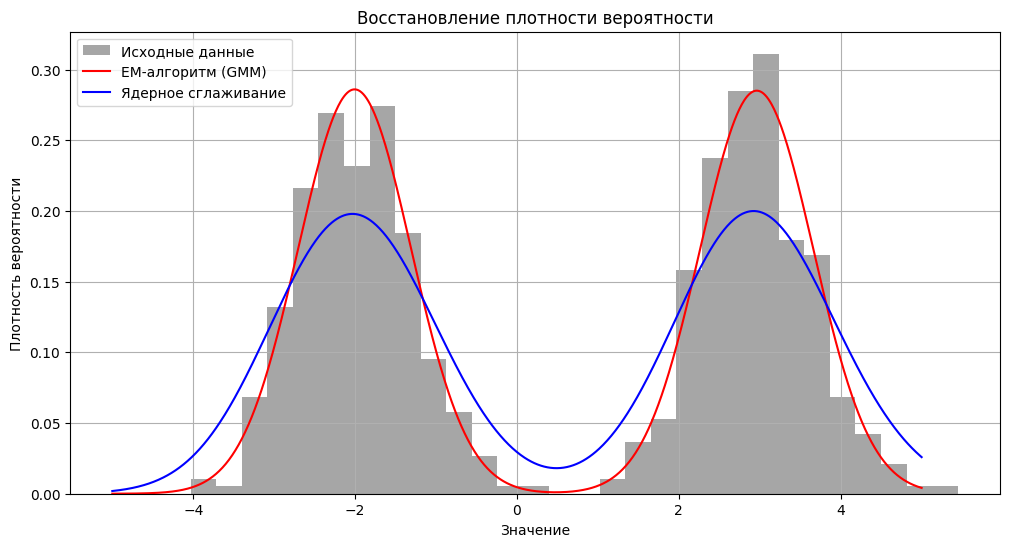

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='gray', label='Исходные данные')

gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))

x = np.linspace(-5, 5, 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf_gmm = np.exp(logprob)

plt.plot(x, pdf_gmm, label='EM-алгоритм (GMM)', color='red')

kde = gaussian_kde(data)
pdf_kde = kde(x.T)

plt.plot(x, pdf_kde, label='Ядерное сглаживание', color='blue')

plt.title('Восстановление плотности вероятности')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

# Метод Метрополиса-Гастингса и Гиббса

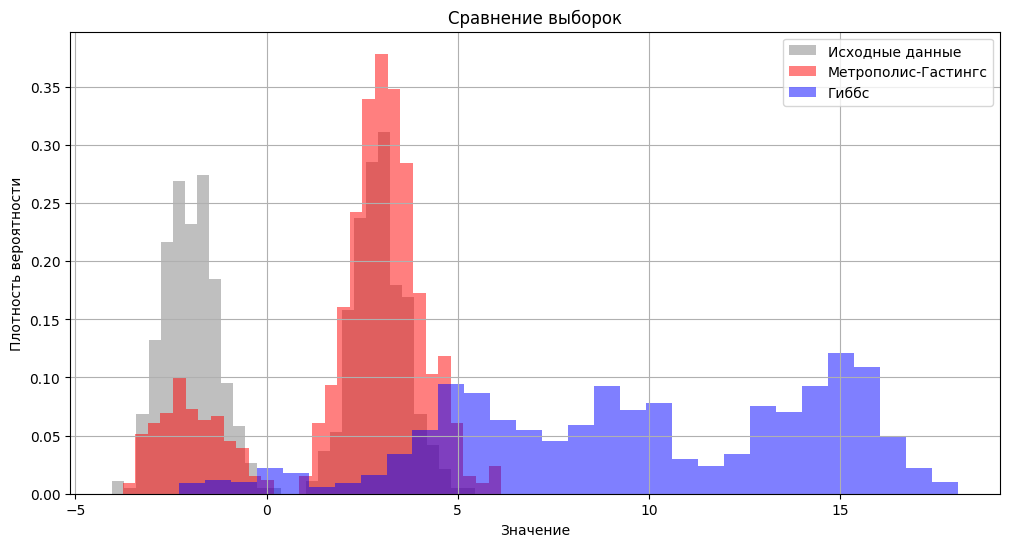

In [4]:

x = np.linspace(-5, 5, 1000)

kde = gaussian_kde(data)
pdf_kde = kde(x)

def metropolis_hastings(pdf, initial, iterations):
    samples = [initial]
    for _ in range(iterations):
        current = samples[-1]
        proposal = np.random.normal(current, 0.5)  
        acceptance_ratio = pdf(proposal) / pdf(current)
        if acceptance_ratio > np.random.rand():
            samples.append(proposal)
        else:
            samples.append(current)
    return np.array(samples)

def gibbs_sampling(pdf, initial, iterations):
    samples = [initial]
    for _ in range(iterations):
        current = samples[-1]
        proposal = np.random.normal(current, 0.5) 
        samples.append(proposal)
    return np.array(samples)

pdf_function = kde.evaluate

initial_point = 0
mh_samples = metropolis_hastings(pdf_function, initial_point, 1000)
gibbs_samples = gibbs_sampling(pdf_function, initial_point, 1000)

plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Исходные данные')
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, color='red', label='Метрополис-Гастингс')
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, color='blue', label='Гиббс')

plt.title('Сравнение выборок')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

# Использование готовых данных из sklearn (два полумесяца)

In [5]:
data, _ = make_moons(n_samples=300, noise=0.1, random_state=30)

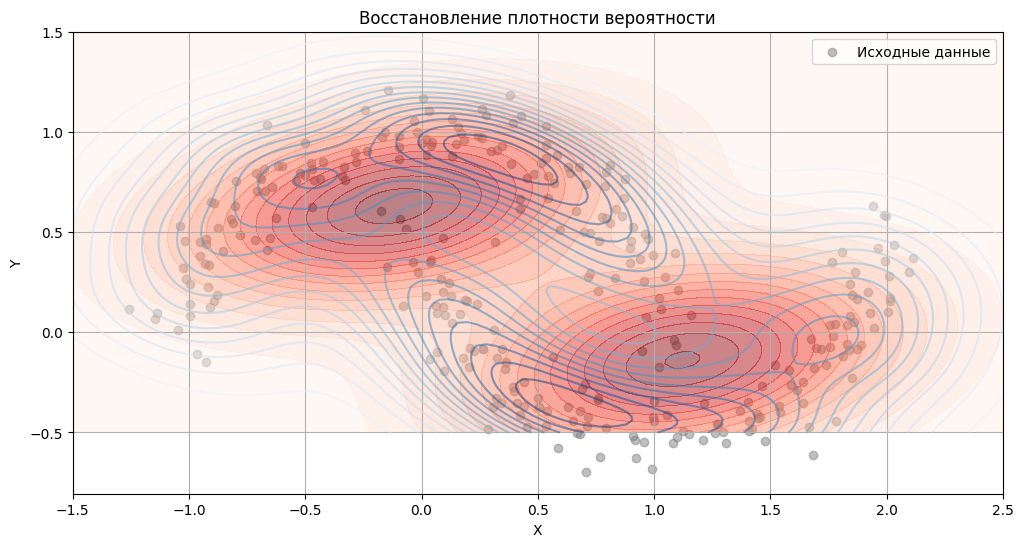

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')

gmm = GaussianMixture(n_components=2)
gmm.fit(data)

x = np.linspace(-1.5, 2.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.ravel(), Y.ravel()])

logprob = gmm.score_samples(xy)
pdf_gmm = np.exp(logprob).reshape(X.shape)

plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Reds', alpha=0.5)

kde = gaussian_kde(data.T)
pdf_kde = kde(np.column_stack([X.ravel(), Y.ravel()]).T).reshape(X.shape)

plt.contour(X, Y, pdf_kde, levels=15, cmap='Blues', alpha=0.5, linewidths=1.5)

plt.title('Восстановление плотности вероятности')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

# Использование готовых данных из sklearn (датасет вин)

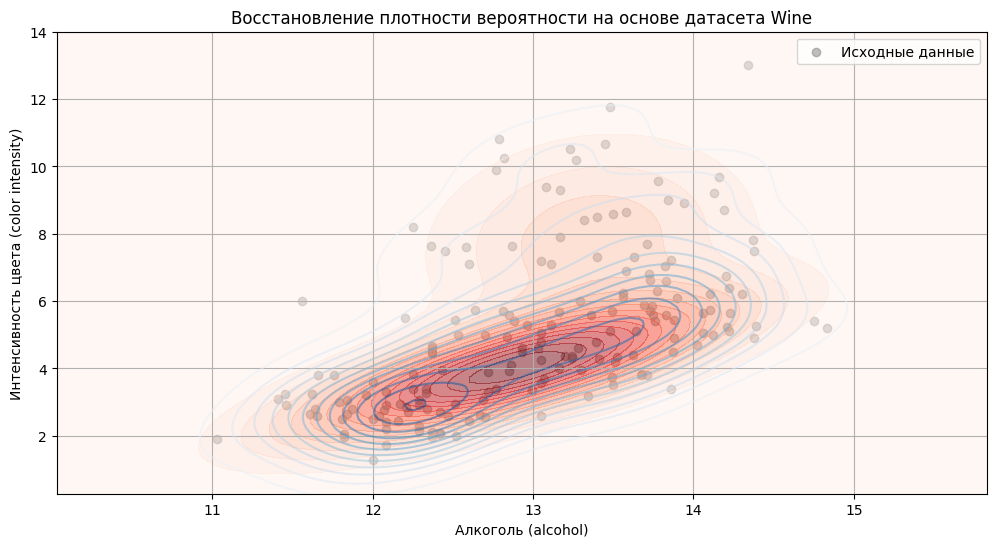

In [10]:
wine_data = load_wine()
data = wine_data.data[:, [0, 9]]  

plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')

gmm = GaussianMixture(n_components=2)
gmm.fit(data)

x = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
y = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.ravel(), Y.ravel()])

logprob = gmm.score_samples(xy)
pdf_gmm = np.exp(logprob).reshape(X.shape)

plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Reds', alpha=0.5)

kde = gaussian_kde(data.T)
pdf_kde = kde(np.column_stack([X.ravel(), Y.ravel()]).T).reshape(X.shape)

plt.contour(X, Y, pdf_kde, levels=15, cmap='Blues', alpha=0.5, linewidths=1.5)

plt.title('Восстановление плотности вероятности на основе датасета Wine')
plt.xlabel('Алкоголь (alcohol)')
plt.ylabel('Интенсивность цвета (color intensity)')
plt.legend(['Исходные данные'])
plt.grid()
plt.show()

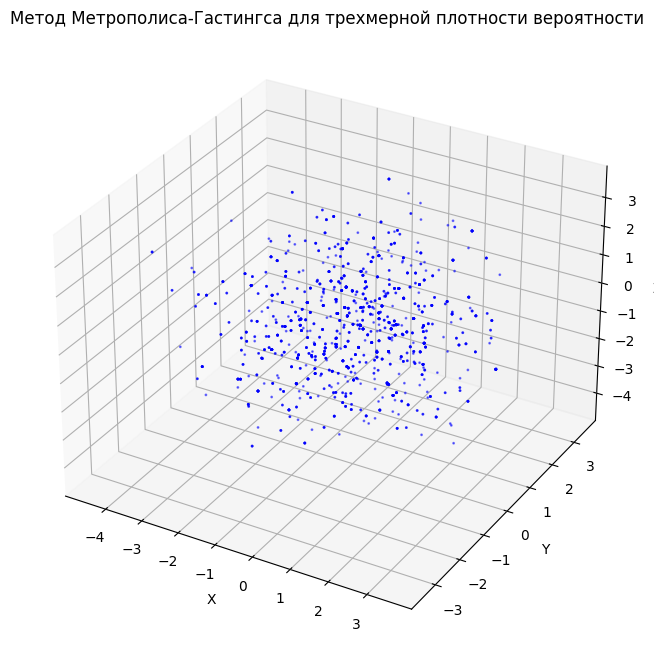

In [19]:
""" Реализация блуждания в случае трехмерной функции плотности в методе МГ """
def target_density_3d(x, y, z):
    return np.exp(-0.3*(x ** 2 + y ** 2 + z ** 2)) #


""" Метод МГ для трехмерного набора точек """
def metropolis_hastings_3d(target_density, init_point, n_samples, proposal_std):
    samples = [init_point]
    current = np.array(init_point)
    for _ in range(n_samples - 1):
        proposal = current + np.random.normal(0, proposal_std, size=3)
        acceptance_ratio = target_density(*proposal) / target_density(*current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current.copy())
    return np.array(samples)

n_samples_3d = 2000
init_point_3d = [0, 0, 0]
proposal_std_3d = 2.0

samples_3d = metropolis_hastings_3d(target_density_3d, init_point_3d, n_samples_3d, proposal_std_3d)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples_3d[:, 0], samples_3d[:, 1], samples_3d[:, 2], c='blue', alpha=0.5, s=1)
ax.set_title('Метод Метрополиса-Гастингса для трехмерной плотности вероятности')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()